In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ex2data2.txt", header=None)
df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
df.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [4]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

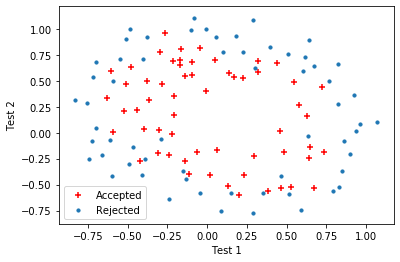

In [5]:
pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted","Rejected"],loc=0)

In [6]:
def mapFeature(x1,x2,degree):
    
    out = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out

In [7]:
X = mapFeature(X[:,0], X[:,1],6)

In [8]:
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

In [9]:
def costFunctionReg(theta, X, y ,Lambda):
   
    m=len(y)
    y=y[:,np.newaxis]
#   y는 118 크기의 벡터에서 [118 x 1] 크기의 행렬이 된다.
#   np.newaxis는 차원을 한 단계 추가한다는 의미이다.
    predictions = sigmoid(X @ theta)
#   2차원 행렬의 곱연산에서는 dot, @ 둘다 같은 결과를 보여준다.
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
#   Logistic Regression에서의 Regularized cost function 공식을 따른다.
    cost = 1/m * sum(error)
#   Logistic Regression에서의 Regularized cost function 공식을 따른다.
    regCost= cost + Lambda/(2*m) * sum(theta**2)
#   Logistic Regression에서의 Regularized cost function 공식을 따른다.
    
    # compute gradient
    j_0= 1/m * (X.transpose() @ (predictions - y))[0]
#   theta_0에 대해서는 gradient descent 공식을 다르게 적용한다.
#   위 계산 결과 나온 것의 0행을 j_0에 저장한다.
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
#   theta_1부터 마지막 theta까지 regularized gradient descent 공식을 그대로 적용한다.
    grad= np.vstack((j_0[:,np.newaxis],j_1))
#   우선 j_0을 [1 x 1] 크기의 행렬로 확장한 것과
#   [27 x 1] 크기의 행렬 j_1를 위아래로 붙인다.
#   grad는 [28 x 1] 크기의 행렬이 된다. theta_0, theta_1, ...을 가지고 있음
    return cost[0], grad

In [10]:
initial_theta = np.zeros((X.shape[1], 1))
# initial_theta를 [X.shape[1](X 행렬의 열의 수) x 1] 크기의 0으로 가득찬 행렬로 지정한다.
Lambda = 1
cost, grad = costFunctionReg(initial_theta, X, y, Lambda)

In [11]:
print("Cost at initial theta (zeros):",cost)

Cost at initial theta (zeros): 0.6931471805599461


In [12]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
  
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
#       costFunctionReg을 적용해 나온 grad에 alpha를 곱하여 기존의 theta값에 빼므로써
#       theta의 값을 업데이트 한다.(regularized gradient descent 공식에 따라)
        J_history.append(cost)
    
    return theta , J_history

In [13]:
theta , J_history = gradientDescent(X,y,initial_theta,1,800,0.2)

In [14]:
print("The regularized theta using ridge regression:\n",theta)

The regularized theta using ridge regression:
 [[ 2.25319932]
 [ 1.44552306]
 [ 2.33283911]
 [-3.57008233]
 [-2.35002884]
 [-3.07090829]
 [ 0.50119267]
 [-0.88407626]
 [-0.69606495]
 [-0.22204243]
 [-2.69560917]
 [ 0.04161168]
 [-1.31573798]
 [-0.80286232]
 [-2.23101395]
 [-0.39638083]
 [-0.43758167]
 [ 0.09476652]
 [-0.69300577]
 [-0.78996079]
 [-0.45416815]
 [-2.01051679]
 [ 0.16446857]
 [-0.59855483]
 [ 0.11471778]
 [-0.73960173]
 [-0.52044034]
 [-1.38532427]]


Text(0.5, 1.0, 'Cost function using Gradient Descent')

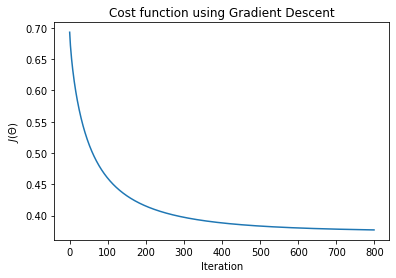

In [15]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [16]:
def mapFeaturePlot(x1,x2,degree):

    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

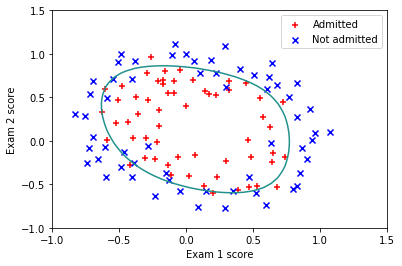

In [17]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
# z는 [50 x 50] 크기의 행렬
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [18]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [19]:
p=classifierPredict(theta,X)
print("Train Accuracy:", (sum(p==y[:,np.newaxis])/len(y) *100)[0],"%")

Train Accuracy: 83.05084745762711 %


In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty="l1")
clf.fit(X,y)

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [111]:
thetaLasso=clf.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'